## <font color='blue'> <b>Task:</b></font>
Credit card frauds are detected using classification algorithms. The algorithms use basic transaction information and decide whether the transaction is legit or fraud. 

        Use this data and develop an algorithm to detect fraudulent transactions.
        You may use MLPClassifie, HistGradientBoostingClassifier, GradientBoostingClassifier or XGboost. 
        You can also compare different models. 


Pay attention to the following questions:
- Which features can be included in the model?
- What is the effect of model (hyper) parameters?
- How successful is the model? 
- What is the success rate for legit and fraud predictions?

## <font color='blue'> <b>Solution:</b></font>

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import shap
import xgboost
import pandas as pd
import seaborn as sns

## Load Dataset

In [2]:
#read a CSV file called "fraud_challenge_150k.csv"
data_raw = pd.read_csv('/Users/imak/documents/python/projects/data_analysis/fraud_challenge_150k.csv')
data_raw.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,12/29/2020 9:05,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,6/22/2021 18:05,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,5/10/2021 13:48,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,3/11/2021 7:36,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,3/27/2021 6:13,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


In [3]:
# make a working datafram of original raw dataframe
working_data = data_raw
working_data.shape

(150000, 26)

In [4]:
#information about a DataFrame
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [5]:
# Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution
working_data.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount
count,149892.000000,149870.000000,149886.000000,149885.000000,149876.000000,149872.000000,149864.000000,149872.000000
mean,4645.751995,2521.458944,54.202434,4702.200033,50190.088160,41837.521512,49.866392,7998.025275
std,1153.816155,604.524161,10.070401,1188.476704,28378.078852,10080.587192,29.204766,4047.071560
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25314.000000,35386.000000,24.000000,4487.000000
50%,4667.000000,2544.000000,55.000000,4730.000000,50117.000000,42086.000000,50.000000,8002.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74338.000000,47374.000000,75.000000,11494.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000


In [6]:
# Features of the dataset 
working_data.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
       'phone_number', 'billing_city', 'billing_postal', 'billing_state',
       'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name',
       'billing_address', 'merchant_id', 'locale', 'tranaction_initiate',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

## Which features to be included ?
- <font color = 'Green'><b> 'account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity' , 'card_bin'  </font></b> were included due to float data type which can be handled by the models.  
- <font color = 'blue'><b>'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'tranaction_initiate', 'EVENT_LABEL' </font></b> categorial data were included due to less category length and one hot coding would be applied to handle the categorical data   
- <font color = 'red'><b> 'ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city','billing_postal', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale' </font></b> categorial data were excluded due to large category length and can not be handled by the models.


In [7]:
#Data selction and processing - Drop columns that we cannot use
working_data = working_data.drop(columns = ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city','billing_postal', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale'])
working_data.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_state,card_bin,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,California,40771.0,cad,D,F,U,X,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,Florida,24480.0,cad,X,X,H,W,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,Utah,37778.0,cad,X,Q,X,X,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,Virginia,55790.0,usd,G,G,C,N,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,South Carolina,37370.0,cad,X,F,F,G,K,21.0,1905.0,legit


# Handeling Missing values

We see there are missing values in the dataset. We need to handle the missing values before using that to the model

In [8]:
# percentage of rows with missing value
missing_rows = working_data.isna().any(axis=1).sum()
total_rows = working_data.any(axis=1).sum()
Percentage_of_missing_rows = missing_rows/total_rows * 100
print("Percentage of rows with missing values is ", round(Percentage_of_missing_rows,2), "%")

Percentage of rows with missing values is  1.12 %


In [9]:
# percentage of rows with missing value in legit event
legit_dataset = working_data[working_data['EVENT_LABEL']== 'legit']
missing_rows_legit = legit_dataset.isna().any(axis=1).sum()
total_rows_legit = legit_dataset.any(axis=1).sum()
Percentage_of_missing_rows_legit = missing_rows_legit/total_rows_legit * 100
print("Percentage of row with missing values in legit class is ", round(Percentage_of_missing_rows_legit,2), "%")

Percentage of row with missing values in legit class is  1.11 %


In [10]:
# percentage of rows with missing value in fraud event
fraud_dataset = working_data[working_data['EVENT_LABEL']== 'fraud']
missing_rows_fraud = fraud_dataset.isna().any(axis=1).sum()
total_rows_fraud = fraud_dataset.any(axis=1).sum()
Percentage_of_missing_rows_fraud = missing_rows_fraud/total_rows_fraud * 100
print("Percentage of row with missing values in fraud class is ", round(Percentage_of_missing_rows_fraud,2), "%")

Percentage of row with missing values in fraud class is  1.19 %


<font color = 'blue'> As we can see the rows with missing value are very less compared to the full dataset. we can delete those rows as MLPClassifer model can not handle missing values.</font>

In [11]:
# Delete all rows with missing values
working_data.dropna(inplace=True)
working_data.isna().sum()

account_age_days         0
transaction_amt          0
transaction_adj_amt      0
historic_velocity        0
billing_state            0
card_bin                 0
currency                 0
cvv                      0
signature_image          0
transaction_type         0
transaction_env          0
tranaction_initiate      0
days_since_last_logon    0
inital_amount            0
EVENT_LABEL              0
dtype: int64

# Looking into EVENT_LABEL classes

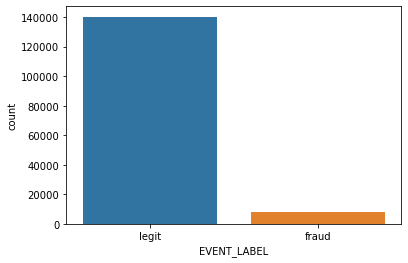

In [12]:
#looking into EVENT_LABEL classes
ax = sns.countplot(x = "EVENT_LABEL", data = working_data)

In [13]:
# Fraud percentage data in the dataset
# The classes are heavily skewed we need to solve this issue.
print('Legit class data is', round(working_data['EVENT_LABEL'].value_counts()[0]/len(working_data) * 100,2), '% of the total dataset')
print('Fraud class data is', round(working_data['EVENT_LABEL'].value_counts()[1]/len(working_data) * 100,2), '% of the total dataset')

Legit class data is 94.56 % of the total dataset
Fraud class data is 5.44 % of the total dataset


<font color = 'blue'>We can see the our original dataset is imbalance. Most of the transactions are legit. Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper model accuracy. Balancing a dataset makes training a model easier because it helps prevent the model from becoming biassed towards one class.</font>

# Balancing the dataset
## Undersampling technique

In [14]:
#Creating Legit and Fraud dataset.
legit_dataset = working_data[working_data['EVENT_LABEL']== 'legit']
fraud_dataset = working_data[working_data['EVENT_LABEL']== 'fraud']

In [15]:
# select sample size
n = fraud_dataset.value_counts().sum()
print(n)

8067


In [16]:
#Create sample dataset
legit_sample_dataset = legit_dataset.sample(n = 8067)

fraud    8067
legit    8067
Name: EVENT_LABEL, dtype: int64

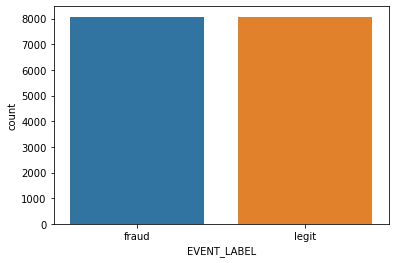

In [17]:
# Create balance dataframe
balance_data_frame = pd.concat([fraud_dataset, legit_sample_dataset], axis=0 )
ax = sns.countplot(x = "EVENT_LABEL", data = balance_data_frame)
balance_data_frame['EVENT_LABEL'].value_counts()

## Using One hot encoding to handle categorical data

In [18]:
#One-hot-encoding
# Select categorical parameters that computer can handle one-hot-encode
hotlist = ('billing_state','currency','cvv','signature_image','transaction_type','transaction_env','tranaction_initiate')

for i in range(len(hotlist)):
    # get_dummies() function is called with the column as the input, and the resulting one-hot encoded DataFrame i
    one_hot_encoded = pd.get_dummies(balance_data_frame[hotlist[i]], prefix = hotlist[i]).astype('int')
    balance_data_frame = pd.concat([balance_data_frame,one_hot_encoded], axis = 1) #Join data
    balance_data_frame = balance_data_frame.drop(columns = [hotlist[i]])

#convert all instances of the string 'legit' in the 'EVENT_LABEL' column to the numerical value 1.
balance_data_frame.loc[balance_data_frame['EVENT_LABEL'].str.contains('legit', na = False),'EVENT_LABEL'] = 1
#convert all instances of the string 'fraud' in the 'EVENT_LABEL' column to the numerical value 0.
balance_data_frame.loc[balance_data_frame['EVENT_LABEL'].str.contains('fraud', na = False),'EVENT_LABEL'] = 0

#convert the data type of the 'EVENT_LABEL' column to integer type
balance_data_frame['EVENT_LABEL'] = balance_data_frame['EVENT_LABEL'].astype('int')



# Prepare the dataset for model

In [19]:
#Prepare data for model
Y = balance_data_frame['EVENT_LABEL'].values #Target
X = balance_data_frame.drop(columns = ['EVENT_LABEL']) #Features
names = X.columns #Save column names
X = X.values

#Scale the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#Divide data to test and train groups
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size = 0.7)

# # Convert array to DataFrame
# X_train = pd.DataFrame(data=X_train, columns=names)
# X_test = pd.DataFrame(data=X_test, columns=names)

### MLPClassifie model and effect of it's hyperparameters

<font size = 3> <b>class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000) </b></font>

The MLPClassifier in scikit-learn is a popular implementation of a feedforward neural network for classification tasks. There are several hyperparameters that can be tuned in MLPClassifier to improve the performance of the model. Here are some of the most important hyperparameters and their effects:  
- <b>hidden_layer_sizes:</b> This hyperparameter controls the number of neurons in each hidden layer. Increasing the number of neurons can improve the model's ability to capture complex patterns in the data, but it can also lead to overfitting if the model becomes too complex.  
- <b>activation:</b> This hyperparameter specifies the activation function used in the hidden layers of the network. The most commonly used activation functions are the rectified linear unit (ReLU), hyperbolic tangent (tanh), and logistic (sigmoid) functions. The choice of activation function can impact the model's ability to learn complex nonlinear relationships in the data.  
- <b>solver:</b> This hyperparameter specifies the optimization algorithm used to train the neural network. Some of the available options in MLPClassifier include 'adam', 'sgd', and 'lbfgs'. The choice of solver can impact the speed of convergence and the quality of the solution found by the algorithm.  
- <b>learning_rate:</b> This hyperparameter controls the step size used during optimization. A smaller learning rate can lead to a more accurate solution, but may require more iterations to converge. Conversely, a larger learning rate can lead to faster convergence, but may result in a less accurate solution.  
- <b>alpha:</b> This hyperparameter controls the amount of regularization applied to the weights in the neural network. Increasing the value of alpha can help to prevent overfitting, but may also result in a less flexible model.  
- <b>early_stopping:</b> This hyperparameter can be set to True to stop training when the validation score no longer improves. This can help to prevent overfitting and speed up the training process.

Overall, the choice of hyperparameters in MLPClassifier can have a significant impact on the performance of the model. It is important to carefully tune these hyperparameters using techniques such as cross-validation to find the optimal combination for a given dataset and problem.

In [20]:
#Definition of model with default hyperparameters

model_MLPClassifier = MLPClassifier()

model_MLPClassifier.fit(X_train, y_train)

print("MLPClassifier Model accuracy on train and test set consecutively is, ",round(model_MLPClassifier.score(X_train,y_train)*100,2),'%',' and ',round(model_MLPClassifier.score(X_test,y_test)*100,2),'%')


MLPClassifier Model accuracy on train and test set consecutively is,  100.0 %  and  87.69 %


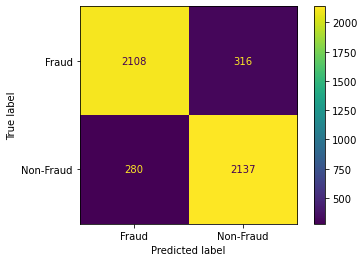

In [21]:
#Confusion Matrix for MLPClassifier
actual = y_test
predicted = model_MLPClassifier.predict(X_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fraud', 'Non-Fraud'])
cm_display.plot()
plt.show()

In [22]:
y_train_pred = model_MLPClassifier.predict(X_train)
y_test_pred = predicted #model_MLPClassifier.predict(X_test)

#Create a dictionary with model scores
scores_dict = {}

scores_dict['MLPClassifier'] = {
        'Model Accuracy':accuracy_score(actual, predicted),
        'f1_Score_Train': f1_score(y_train, y_train_pred.round()),
        'f1_Score_Test': f1_score(y_test, y_test_pred.round()),
    }

### HistGradientBoostingClassifier model and effect of it's hyperparameters

<font size = 3> <b>class sklearn.ensemble.HistGradientBoostingClassifier(loss='log_loss', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None, class_weight=None) </b></font>

HistGradientBoostingClassifier is a gradient boosting machine learning algorithm that builds an ensemble of decision trees to perform classification. Here are some of the most important hyperparameters in HistGradientBoostingClassifier and their effects:  

- <b>learning_rate:</b> This hyperparameter controls the step size used to update the weights of the model during training. A smaller learning rate can help to prevent overfitting, but may require more iterations to converge. A larger learning rate can lead to faster convergence, but may result in a less accurate solution.  
- <b>max_depth:</b> This hyperparameter specifies the maximum depth of the decision trees used in the ensemble. Increasing the depth of the trees can lead to a more complex model that can capture more intricate relationships in the data. However, this can also lead to overfitting if the model becomes too complex.  
- <b>max_leaf_nodes:</b> This hyperparameter specifies the maximum number of leaf nodes allowed in each decision tree. This can be used to control the complexity of the model and prevent overfitting.
- <b>min_samples_leaf:</b> This hyperparameter specifies the minimum number of samples required to be in a leaf node. This can also be used to control the complexity of the model and prevent overfitting.  
- <b>max_bins:</b> This hyperparameter controls the number of bins used to discretize continuous features. Increasing the number of bins can improve the accuracy of the model by capturing more of the underlying distribution of the data. However, this can also increase the model's complexity and training time.  
- <b>l2_regularization:</b> This hyperparameter controls the amount of L2 regularization applied to the weights in the model. Increasing the amount of regularization can help to prevent overfitting and improve generalization performance.  

Overall, the choice of hyperparameters in HistGradientBoostingClassifier can have a significant impact on the performance of the model. It is important to carefully tune these hyperparameters using techniques such as cross-validation to find the optimal combination for a given dataset and problem.

In [23]:
#Definition of model with default hyperparameters
model_HistGradientBoostingClassifier = HistGradientBoostingClassifier()

model_HistGradientBoostingClassifier.fit(X_train, y_train)

print("HistGradientBoostingClassifier Model accuracy on train and test set consecutively is, ",round(model_HistGradientBoostingClassifier.score(X_train,y_train)*100,2),' % and ',round(model_HistGradientBoostingClassifier.score(X_test,y_test)*100,2),'%')


HistGradientBoostingClassifier Model accuracy on train and test set consecutively is,  93.77  % and  90.29 %


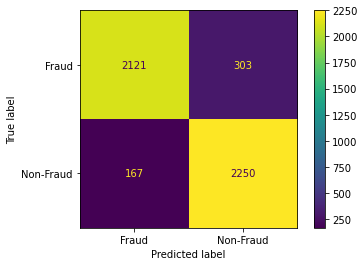

In [24]:
#Confusion Matrix for HistGradientBoostingClassifier
actual = y_test
predicted = model_HistGradientBoostingClassifier.predict(X_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fraud', 'Non-Fraud'])
cm_display.plot()
plt.show()

In [25]:
y_train_pred = model_HistGradientBoostingClassifier.predict(X_train)
y_test_pred = model_HistGradientBoostingClassifier.predict(X_test)

#Create a dictionary with model scores
scores_dict['HistGradientBoostingClassifier'] = {
        'Model Accuracy':accuracy_score(actual, predicted),
        'f1_Score_Train': f1_score(y_train, y_train_pred.round()),
        'f1_Score_Test': f1_score(y_test, y_test_pred.round()),
    }

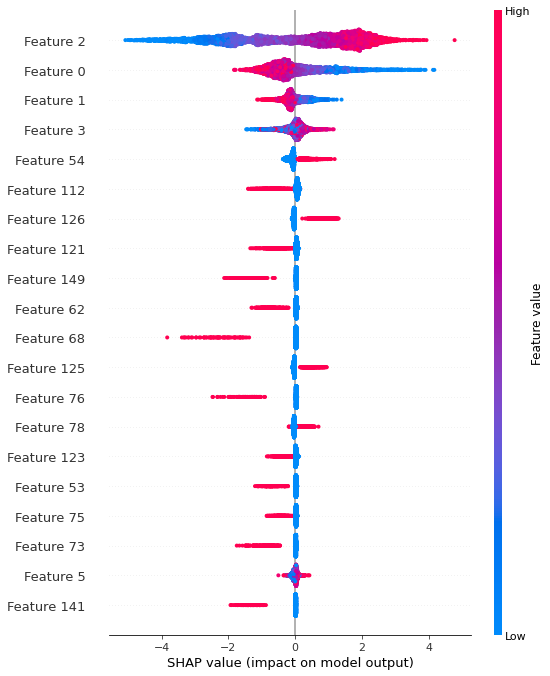

In [26]:
#Feature impact on model output
explainer = shap.TreeExplainer(model_HistGradientBoostingClassifier)
pred = model_HistGradientBoostingClassifier.predict(X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### GradientBoostingClassifier model and effect of it's hyperparameters

<font size = 3> <b>class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)</b></font>

GradientBoostingClassifier is a machine learning algorithm that builds an ensemble of decision trees to perform classification. Here are some of the most important hyperparameters in GradientBoostingClassifier and their effects:  
- <b>learning_rate:</b> This hyperparameter controls the step size used to update the weights of the model during training. A smaller learning rate can help to prevent overfitting, but may require more iterations to converge. A larger learning rate can lead to faster convergence, but may result in a less accurate solution.  
- <b>n_estimators:</b> This hyperparameter specifies the number of decision trees used in the ensemble. Increasing the number of trees can improve the accuracy of the model, but can also lead to longer training times.  
- <b>max_depth:</b> This hyperparameter specifies the maximum depth of the decision trees used in the ensemble. Increasing the depth of the trees can lead to a more complex model that can capture more intricate relationships in the data. However, this can also lead to overfitting if the model becomes too complex.  
- <b>min_samples_split:</b> This hyperparameter specifies the minimum number of samples required to split a node in a decision tree. Increasing this value can help to prevent overfitting by requiring more samples in each split, but may also result in a less accurate model.  
- <b>min_samples_leaf:</b> This hyperparameter specifies the minimum number of samples required to be in a leaf node. This can be used to control the complexity of the model and prevent overfitting.  
- <b>subsample:</b> This hyperparameter specifies the fraction of the training data used to train each tree in the ensemble. Setting this value to less than 1.0 can help to prevent overfitting by introducing randomness into the training process.

Overall, the choice of hyperparameters in GradientBoostingClassifier can have a significant impact on the performance of the model. It is important to carefully tune these hyperparameters using techniques such as cross-validation to find the optimal combination for a given dataset and problem.

In [27]:
#Definition of model with changed hyperparameters
model_GradientBoostingClassifier =GradientBoostingClassifier(n_estimators = 200, max_depth=3, random_state=0)

model_GradientBoostingClassifier.fit(X_train, y_train)

print("GradientBoostingClassifier Model accuracy on train and test set consecutively is, ",round(model_GradientBoostingClassifier.score(X_train,y_train)*100,2),'% and ',round(model_GradientBoostingClassifier.score(X_test,y_test)*100,2),'%')

GradientBoostingClassifier Model accuracy on train and test set consecutively is,  91.3 % and  89.46 %


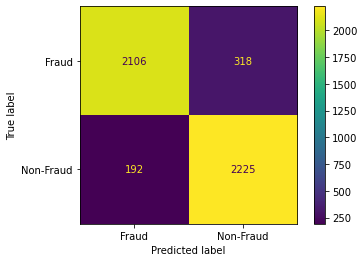

In [28]:
#Confusion Matrix for GradientBoostingClassifier
actual = y_test
predicted = model_GradientBoostingClassifier.predict(X_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fraud', 'Non-Fraud'])
cm_display.plot()
plt.show()

In [29]:
y_train_pred = model_GradientBoostingClassifier.predict(X_train)
y_test_pred = model_GradientBoostingClassifier.predict(X_test)

#Create a dictionary with model scores
scores_dict['GradientBoostingClassifier'] = {
        'Model Accuracy':accuracy_score(actual, predicted),
        'f1_Score_Train': f1_score(y_train, y_train_pred.round()),
        'f1_Score_Test': f1_score(y_test, y_test_pred.round()),
    }


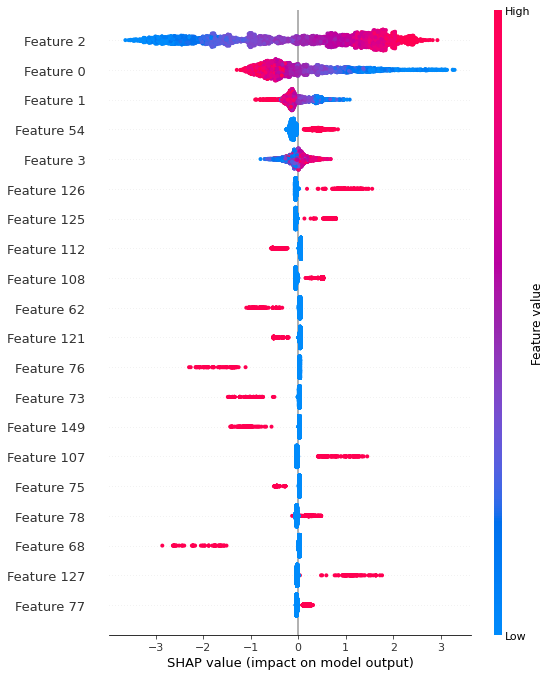

In [30]:
#Feature impact on model output
explainer = shap.TreeExplainer(model_GradientBoostingClassifier)
pred = model_GradientBoostingClassifier.predict(X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


### XGBoostClassifier model and effect of it's hyperparameters

<font size=3><b>XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)</b></font>

The XGBClassifier is a powerful machine learning model with several hyperparameters that can be tuned to optimize its performance. Here's an overview of the effects of some of the key hyperparameters:  
- <b>n_estimators:</b> This hyperparameter controls the number of trees in the ensemble. Increasing n_estimators generally improves the model's performance, but it can also make the model slower and more prone to overfitting.  
- <b>tree_method:</b> This hyperparameter determines the algorithm used to construct the decision trees. The default value is "auto", which selects the best algorithm based on the training data. Other options include "exact" for exact greedy algorithm, "approx" for approximate greedy algorithm, and "hist" for approximate algorithm that uses histogram counting. The choice of tree_method can impact the model's training time and accuracy.  
- <b>subsample:</b> This hyperparameter controls the fraction of the training instances used to train each tree. Setting a value less than 1.0 enables stochastic gradient boosting, which can help improve the model's generalization and reduce overfitting.  
- <b>colsample_level:</b> This hyperparameter controls the fraction of the features used to train each tree. Like subsample, setting a value less than 1.0 enables stochastic gradient boosting and can help reduce overfitting.  
- <b>verbose:</b> This hyperparameter controls the level of verbosity of the training process. Setting verbose to a higher value will output more information during training, such as the progress of each tree.  
- <b>n_jobs:</b> This hyperparameter controls the number of CPU cores used during training. Increasing n_jobs can speed up the training process, but may also require more memory.  
- <b>random_state:</b> This hyperparameter sets the seed for the random number generator used by the model, which can help ensure reproducibility.

It's important to note that the optimal values for these hyperparameters will depend on the specific dataset and task, and should be selected through a combination of experimentation and careful validation.

In [31]:
#Definition of model with changed hyperparameters
model_xgboost = xgboost.XGBClassifier(n_estimators=200,tree_method='hist',subsample=0.67,colsample_level=0.06,verbose=0,n_jobs=6,random_state=12)
model_xgboost.fit(X_train, y_train)

print("XGBoostClassifier Model accuracy on train and test set consecutively is, ",round(model_xgboost.score(X_train,y_train)*100,2),'% and ',round(model_xgboost.score(X_test,y_test)*100,2),'%')

[00:57:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "colsample_level", "verbose" } are not used.

XGBoostClassifier Model accuracy on train and test set consecutively is,  99.72 % and  89.77 %


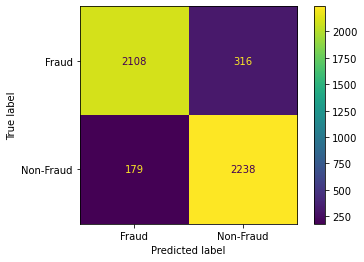

In [32]:
#Confusion Matrix for xgboost
actual = y_test
predicted = model_xgboost.predict(X_test)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fraud', 'Non-Fraud'])
cm_display.plot()
plt.show()

In [33]:
y_train_pred = model_xgboost.predict(X_train)
y_test_pred = model_xgboost.predict(X_test)

#Create a dictionary with model scores
scores_dict['XGBoostClassifier'] = {
        'Model Accuracy':accuracy_score(actual, predicted),
        'f1_Score_Train': f1_score(y_train, y_train_pred.round()),
        'f1_Score_Test': f1_score(y_test, y_test_pred.round()),
    }


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


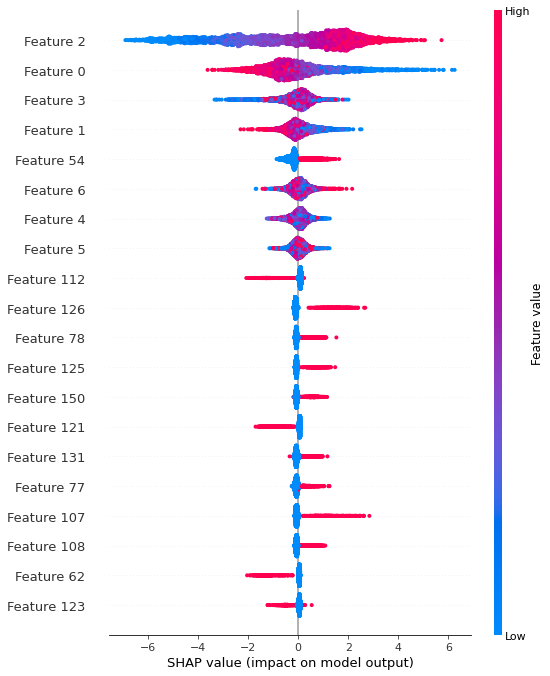

In [34]:
#Feature impact on model output
explainer = shap.TreeExplainer(model_xgboost)
pred = model_xgboost.predict(X_test, output_margin=True)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


# How successful is the model? 
# What is the success rate for legit and fraud predictions?

F1 score is a common classification machine learning metric. F1 score is nothing but combination of Both Precision & Recall. This is the one uninterpretable single elegant measure which tells about both precision & recall. It is a popular metric to use for classification models as it provides accurate results for both balanced and imbalanced datasets.F1 score can be interpreted as a measure of overall model performance from 0 to 1, where 1 is the best. 

                                Model Accuracy  f1_Score_Train  f1_Score_Test
MLPClassifier                         0.876885        1.000000       0.877618
HistGradientBoostingClassifier        0.902913        0.939558       0.905433
GradientBoostingClassifier            0.894650        0.915140       0.897177
XGBoostClassifier                     0.897748        0.997173       0.900422


[]

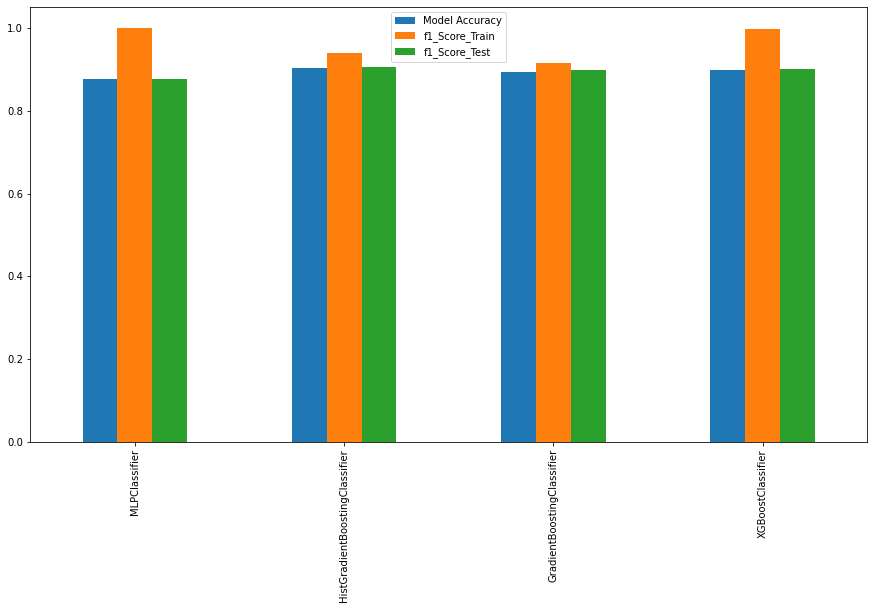

In [35]:
scores_df = pd.DataFrame(scores_dict)
scores_df = scores_df.T
print(scores_df)
scores_df.plot(kind='bar', figsize=(15, 8))
plt.plot()

From the above graph we can say that all the models perfomed well and we could also measure the success rate of those models. It can be said that XGBoostClassifier is the best model in this case.